In [1]:
from libs.dinov2_latent_generator import DinoV2latentGen
model_cfg = {
    'name': 'dinov2_vitb14',
    'struct': 'dinov2/',
    'path': 'dinov2_vitb14_pretrain.pth',
}
latentGenerator = DinoV2latentGen(model_cfg, 'mps')

/Users/raiso/mask_export_center_area/dinov2/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/Users/raiso/mask_export_center_area/dinov2/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/Users/raiso/mask_export_center_area/dinov2/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


Device:  mps


In [2]:
from libs.video_analysis import VideoAnalyzer
import gradio as gr

objects = [
    [152, 210, 74], #{"R": 152, "G": 210, "B":74},
]
analyzer = VideoAnalyzer(objects)

results = analyzer.process_video("test/S37_mask.mp4", gr.Progress())

/Users/raiso/mask_export_center_area/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


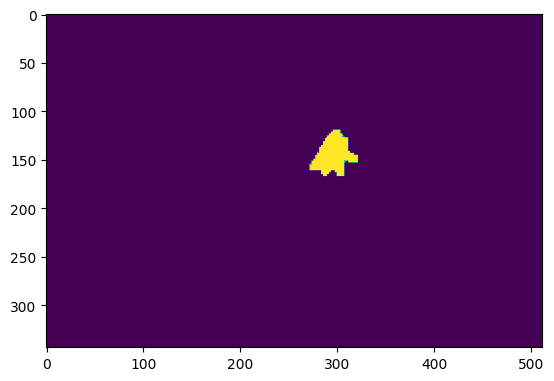

In [9]:
import matplotlib.pyplot as plt
for it in results:
    plt.imshow(results[it].labels[0])
    break

In [13]:
from tqdm import tqdm
import cv2

vin = "test/S37_fv.avi"
cap = cv2.VideoCapture(vin)
n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for i in tqdm(range(n)):
    ok, image = cap.read()
    assert ok, "[E] Video Reading Error"
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if i == 10:
        break

cap.release()


  0%|          | 10/9600 [00:00<00:29, 321.47it/s]


In [14]:
image.shape

(344, 512, 3)